# Лабораторная работа №4. Кластеризация

## Постановка цели и задачи

Цель работы: изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

Постановка задачи:

1. Загрузить датасет для задачи кластеризации / классификации (например, с платформы Kaggle). Провести дескриптивный анализ данных: определить размерность, типы признаков, наличие пропусков. Оценить распределение переменных (близость к нормальному) с использованием визуализации (гистограммы). Проверить условие применения кластеризации: отсутствие классов, осмысленность кластеризации, отсутствие выбросов.

2. Выполнить стандартизацию / нормализацию числовых признаков. Обосновать выбор метода масштабирования. Построить матрицу диаграмм рассеивания для визуальной оценки структуры данных, предположительного количества кластеров и типа кластерной структуры. Аргументировать выбор методов кластеризации на основе формы, размера и плотности кластеров.

3. Реализовать кластеризацию двумя различными методами на выбор: K-means (K-средних); иерархическая кластеризация; DBSCAN; EM-алгоритм (Gaussian Mixture). Для методов, требующих задания числа кластеров (K-means, иерархическая), подобрать оптимальное значение k с использованием: метода локтя и / или анализа силуэта.

4. Рассчитать метрики качества для обоих методов: внутренние и внешние. Оценить расстояние между кластерами, внутрикластерные расстояния, компактность кластеров, центры кластеров. Опционально, если известно разделение на классы, посчитать: индекс Rand, индекс Жаккара и др. внешние метрики. Привести содержательную интерпретацию полученных значений.

5. Исследовать влияние параметров одного из методов (например, ε и min_samples для DBSCAN или количества кластеров k для K-means) на качество кластеризации.

6. Визуализировать полученные кластеры в пространстве признаков (использовать PCA для снижения размерности при необходимости). Проанализировать центры кластеров (для K-means) и дать содержательную интерпретацию выделенных групп. Сравнить результаты, полученные двумя разными методами.

# Описание датасета

В качестве датасета я выбрала «Wine Customer Segmentation» («Сегментация потребителей вина»). Эти данные являются результатом химического анализа вин, выращенных в одном и том же регионе Италии, но из разных сортов винограда. В ходе анализа было определено количество 13 компонентов, содержащихся в каждом из разных типов вин. Задача состоит в кластеризации сортов винограда (или типов вин).

Имеющиеся признаки:

- Alcohol - Алкоголь
- Malic acid - Яблочная кислота
- Ash - Зола
- Alcalinity of ash - Щелочность золы
- Magnesium - Магний
- Total phenols - Общее содержание фенолов
- Flavanoids - Флавоноиды
- Nonflavanoid phenols - Нефлавоноидные фенолы
- Proanthocyanins - Проантоцианины
- Color intensity - Интенсивность цвета
- Hue - Оттенок
- OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин
- Proline - Пролин

Загрузим данные:

In [22]:
import pandas as pd
import seaborn as sns

file_path = "WineDataset.csv"
df_orig = pd.read_csv(file_path)
df_orig.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Видим, что пропущенных значений нет. Проведем дескриптивный анализ:

In [23]:
df = df_orig.drop(columns=["Customer_Segment"], axis=1)
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Набор данных содержит 178 образцов вина и 13 химических характеристик. В среднем содержание алкоголя составляет около 13 градусов, при этом разброс относительно небольшой, что делает этот показатель стабильным и без значительных выбросов. Маликовая кислота, наоборот, демонстрирует значительную вариативность: значения меняются от 0.74 до 5.8, что указывает на сильную гетерогенность между образцами и делает этот параметр важным для последующей кластеризации. Значение Ash меняется в узком диапазоне, и стандартное отклонение здесь одно из самых низких, поэтому этот признак вносит минимальный вклад в различия между образцами. Щелочность золы более вариативна, имеет широкий диапазон от 10.6 до 30, что говорит о возможном наличии выбросов или существенных различий в технологии производства разных видов вина.

Содержание магния распределено достаточно равномерно, без выраженных аномалий, и показывает умеренный разброс. Показатели Total Phenols и OD280 варьируются умеренно, что делает их вполне информативными, но не крайними по дисперсии. Одним из ключевых признаков являются флавоноиды: значение этого показателя сильно различается между образцами и может достигать более 5, что делает его одним из основных факторов, влияющих на разделение данных в PCA и кластеризации. В отличие от них, показатель Nonflavanoid Phenols почти не изменяется и вносит сравнительно небольшой вклад в различимость объектов.

Параметр Proanthocyanins варьируется умеренно и обычно также участвует в разделении классов. Интенсивность окраски вина отличается очень большим разбросом: значения меняются от 1.28 до 13. Такие масштабные различия делают этот признак существенным источником дисперсии в данных. Показатель Hue ведёт себя достаточно стабильно, диапазон относительно узкий, что говорит о более однородных характеристиках по этому параметру.

Самым нестабильным и сильно распределённым параметром является Proline. Значения изменяются от 278 до 1680, а стандартное отклонение более 300 - это рекорд среди всех признаков. Такое поведение характерно для признаков, имеющих правостороннюю асимметрию и большое количество высоких значений. Именно Proline чаще всего вносит максимальный вклад в первую компоненту PCA, поскольку доминирует по масштабу.

В целом данные демонстрируют значительную неоднородность, что делает стандартизацию обязательным шагом. Некоторые признаки отличаются высокой вариативностью и сильно влияют на разложение PCA (например, Proline, Color Intensity, Flavanoids), тогда как другие почти не меняются и, вероятно, будут иметь низкую информативность (например, Nonflavanoid Phenols и Ash). Такое соотношение сильных и слабых признаков типично для химических данных и объясняет, почему PCA или кластеризация обычно выдают хорошо различимые группы в этом датасете.

Построим ящик с усами, чтобы проверить наличие выбросов:

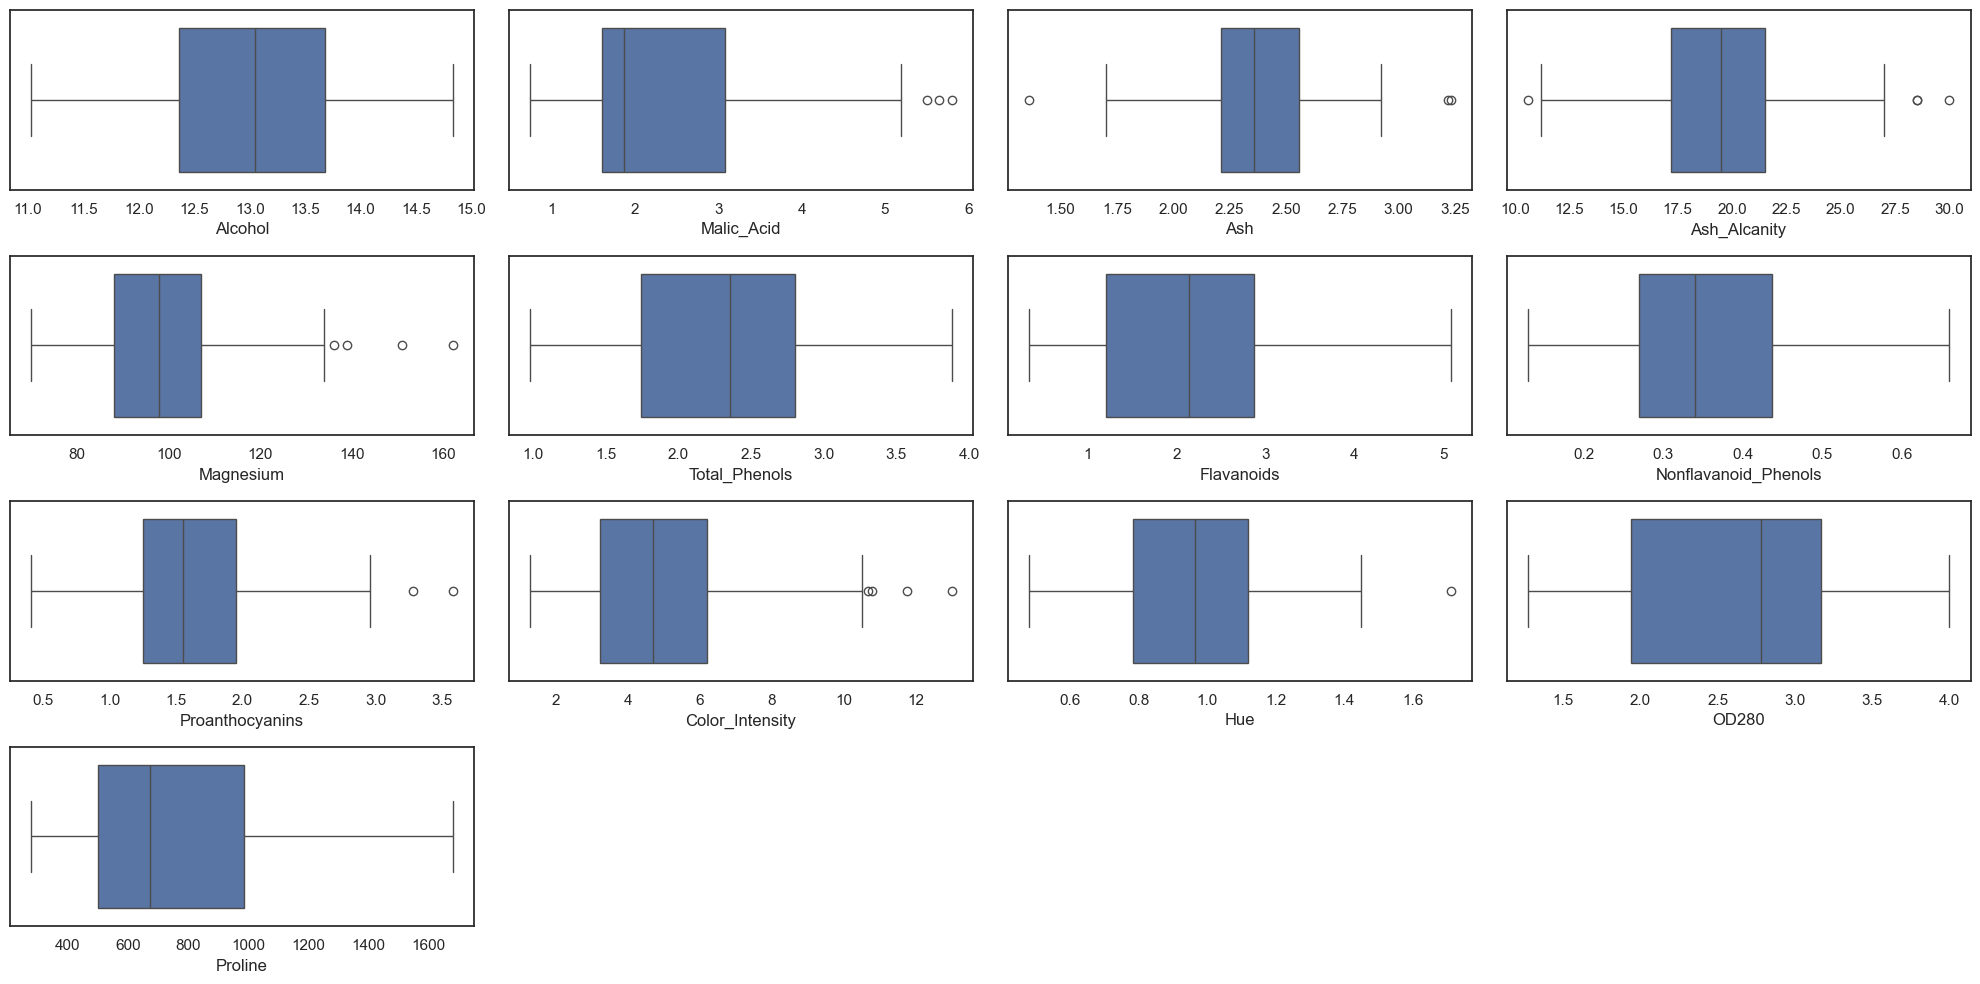

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.columns

plt.figure(figsize=(20, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//4 + 1, 4, i)
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()



На ящике с усами наблюдается небольшое количество выбросов, удалим их:

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_clean = df_orig.copy()

for col in df.columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape

(161, 14)

Мы избавили от 17 выбросов.

Построим гистограммы распределений признаков:

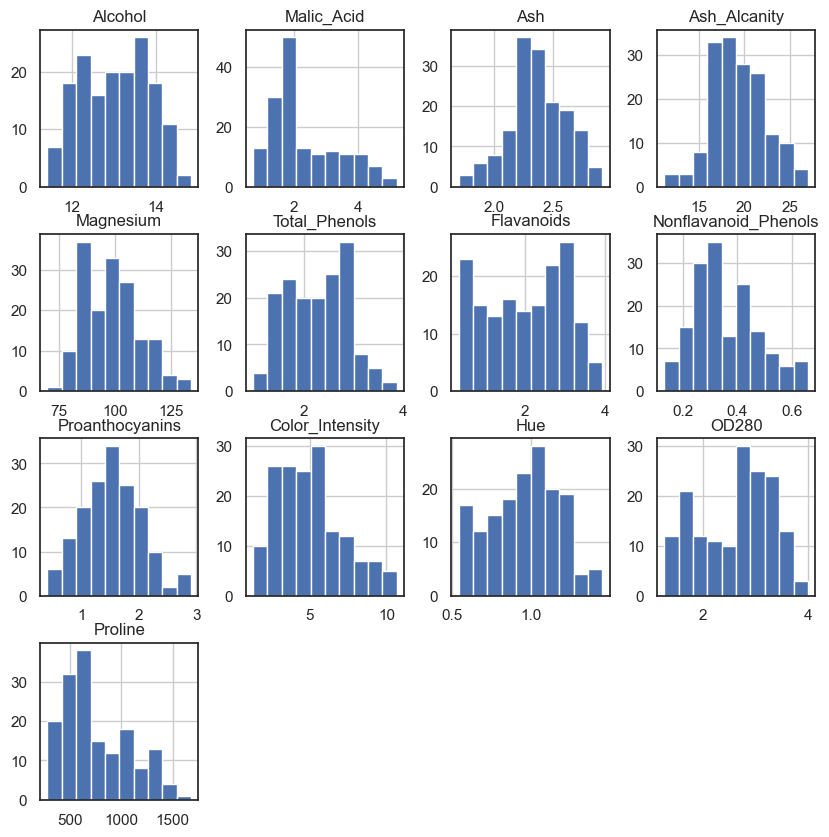

In [26]:
df_orig = df_clean
df = df_orig.drop(columns=["Customer_Segment"], axis=1)
df.hist(bins=10, figsize=(10, 10))
plt.show()

Большинство переменных датасета обладают выраженной ненормальностью. Это полностью согласуется с природой химических показателей вина, которые обычно имеют асимметричные, часто правосторонние распределения. Такое поведение данных делает стандартизацию обязательной.

## Предобработка данных

Для начала оценим значимость признаков с помощью дисперсионного анализа:

In [27]:
from sklearn.feature_selection import f_classif
import pandas as pd
import pandas as pd
from sklearn.feature_selection import f_classif
from scipy.stats import f

y_true = df_orig['Customer_Segment'].map({1: 0, 2: 1, 3: 2}).values
F_values, p_values = f_classif(df, y_true)

df_anova = pd.DataFrame({
    'feature': df.columns,
    'F_value': F_values,
    'p_value': p_values
}).sort_values("F_value", ascending=False)

df1 = 1
df2 = len(df) - 2

alpha = 0.005

F_critical = f.ppf(1 - alpha, df1, df2)
print(f"F-критическое = {F_critical} при уровне значимости {alpha}")
significant_F = df_anova[df_anova['F_value'] > 0]


print("Значимые признаки:")
print(significant_F)
significant_features = significant_F['feature'].tolist()



F-критическое = 8.103912841435498 при уровне значимости 0.005
Значимые признаки:
                 feature     F_value       p_value
6             Flavanoids  286.079239  3.047589e-53
12               Proline  215.034276  8.111505e-46
11                 OD280  176.760861  4.939096e-41
0                Alcohol  127.039317  1.289681e-33
9        Color_Intensity  110.686986  8.862879e-31
5          Total_Phenols  103.060354  2.267383e-29
10                   Hue   97.057297  3.205324e-28
8        Proanthocyanins   44.542741  4.560146e-16
3           Ash_Alcanity   43.828977  7.207325e-16
1             Malic_Acid   39.816006  9.940748e-15
4              Magnesium   30.241780  7.582762e-12
7   Nonflavanoid_Phenols   26.889513  8.895231e-11
2                    Ash   12.328812  1.058091e-05


Можем сделать вывод, что все признаки значимы (значения F больше F критического для всех переменных), однако надо сделать так же корреляционный анализ.

Анализ корреляций необходим для выявления мультиколлинеарности и последующего удаления или объединения признаков, дублирующих друг друга. Это улучшает интерпретируемость и делает пространство признаков более равномерным. Построим матрицу корреляций:

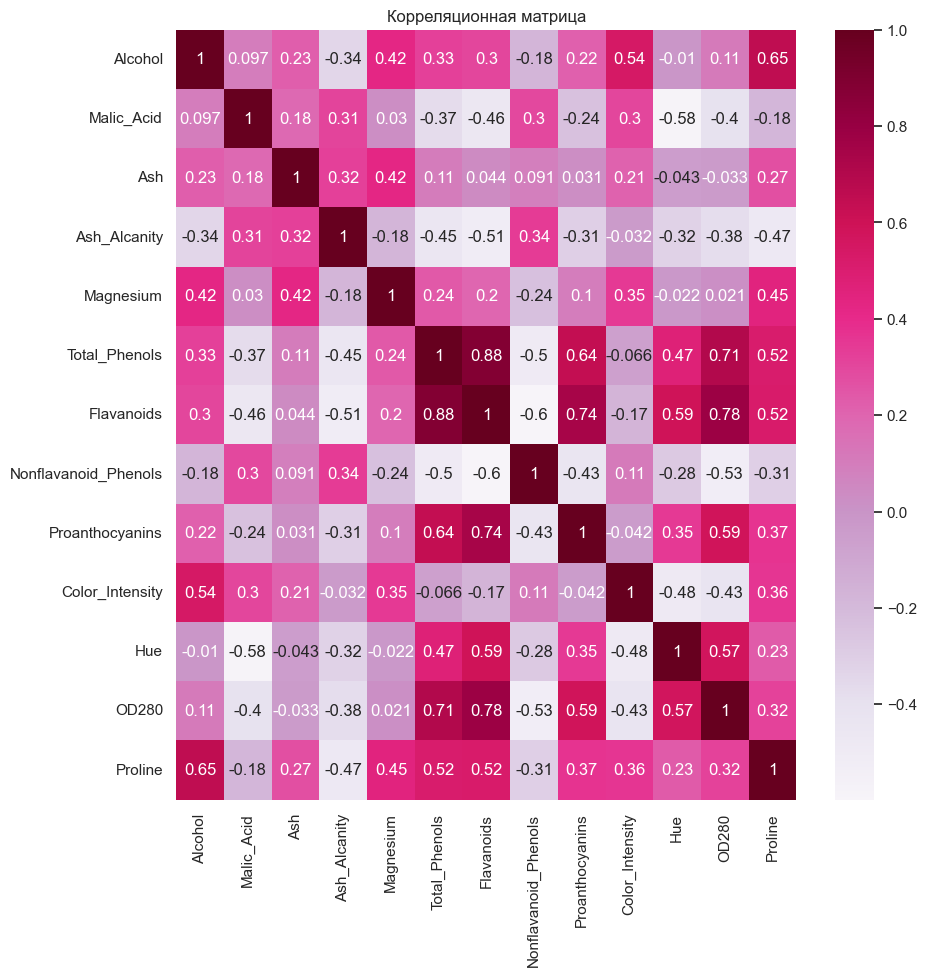

In [28]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="PuRd")
plt.title('Корреляционная матрица')
plt.show()

Можем заметить, что признаки Total_Phenols и Flavanoids имеют большой коэффициент корреляции - 0.88, поэтому удалим Total_Phenols, т.к. он наименее значим. Также Proanthocyanins и Flavanoids коррелируют, удалим Proanthocyanins по той же причине, и OD280 с Flavanoids, удалим OD280, т.к. он наименее значим. Hue также коррелирует с Flavanoids, он не сильно значим, удалим его и Alcohol, т.к. он коррелирует с Proline и наименее значим.

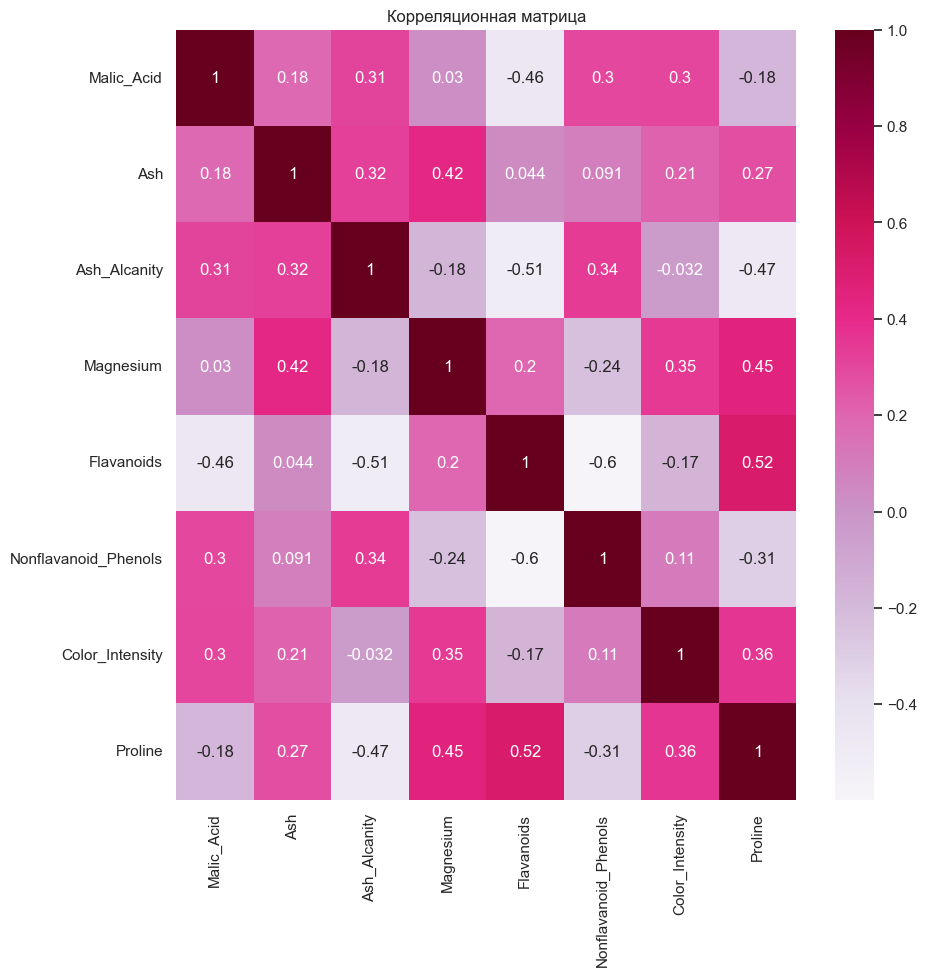

In [29]:
df = df.drop(columns=['Total_Phenols', 'Proanthocyanins', 'OD280', 'Alcohol', 'Hue'], axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="PuRd")
plt.title('Корреляционная матрица')
plt.show()



После очистки данных коррелируемых признаков больше нет.

Стандартизируем данные:

In [30]:
from sklearn.preprocessing import StandardScaler

X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Построим диаграмму рассеивания для оценки количества кластеров и выбора метода кластеризации:

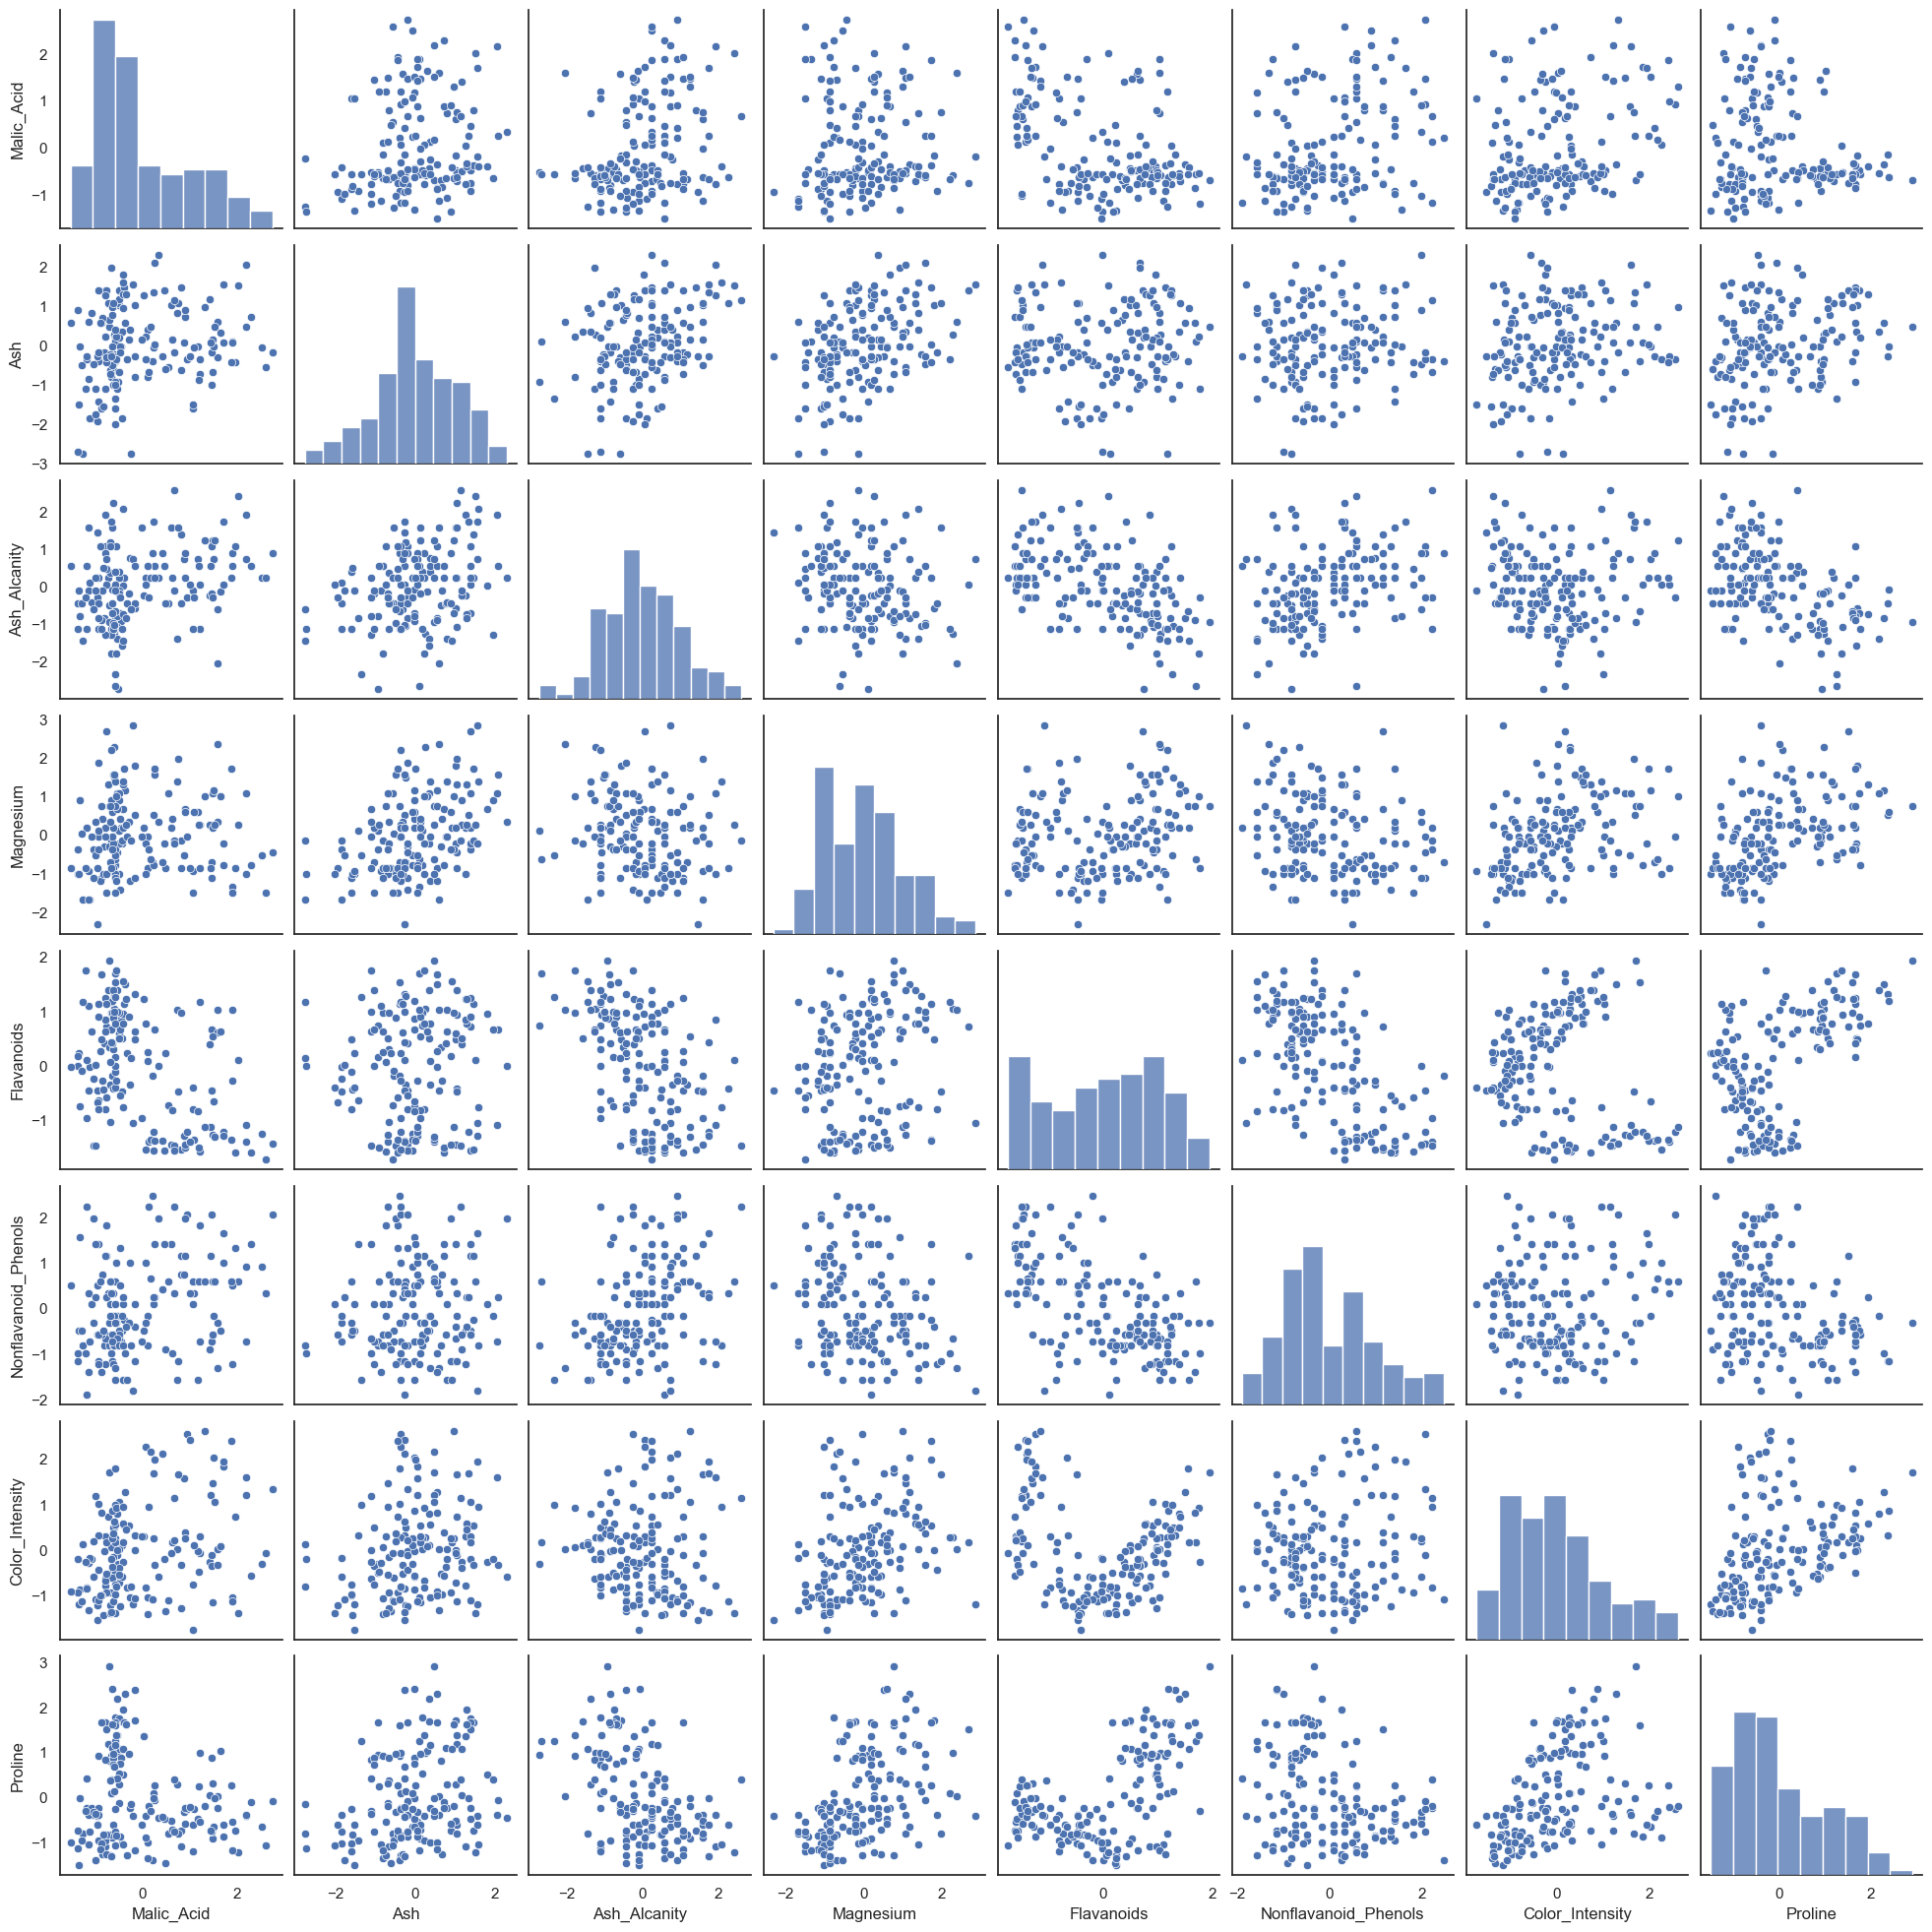

In [31]:

sns.pairplot(df_scaled)


Построенная матрица диаграмм рассеивания позволяет провести предварительную визуальную оценку структуры данных и понять, насколько выражены потенциальные кластеры. На графиках видно, что объекты распределены довольно равномерно, без чётко обособленных "островков" плотности, что говорит об отсутствии явно разделённых групп. Однако можно рассмотреть 2-3 облачных кластера, которые не имеют четкой границы и скорее всего находятся рядом друг с другом. 

Применим метод K-means остаётся, т.к. мы сделали стандартизацию признаков и удаление выбросов, а так же кластеры напоминают сферическую форму.

Вторым методом выберем иерархическую кластеризацию, т.к. она не предполагает конкретной формы кластеров и позволяет выявлять вложенную структуру данных на разных уровнях объединения объектов. Этот метод хорошо справляется с постепенным изменением плотности и позволяет визуально оценить разбиение данных через дендрограмму, что особенно полезно при работе с пересекающимися и частично размытыми кластерами.

Таким образом, визуальная оценка диаграммы рассеивания показывает слабовыраженную, частично перекрывающуюся кластерную структуру, что делает применение иерархической кластеризации более оправданным, наряду с K-means, для получения интерпретируемого и наглядного разбиения данных.


## Ход работы

### Определение количества кластеров

Сначала определим количество кластером с помощью метода локтя и графика силуэтного анализа для K-means:

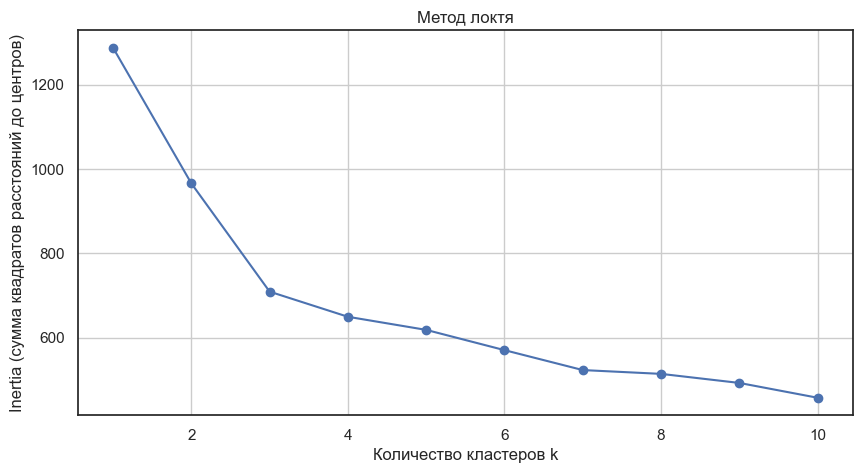

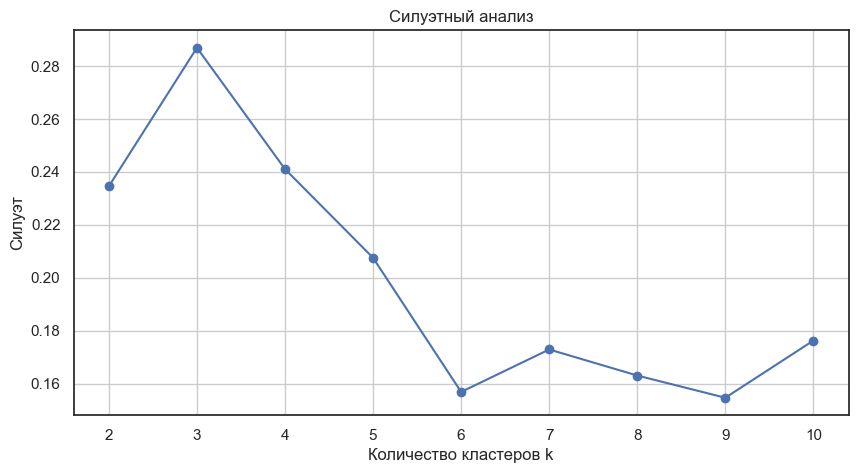

In [32]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia (сумма квадратов расстояний до центров)")
plt.grid(True)
plt.show()
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Силуэтный анализ")
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт")
plt.grid(True)
plt.show()


На графике локтя отчётливо видно, что при переходе от 2 кластера к 3 происходит резкое снижение значения inertia, что свидетельствует о существенном улучшении качества разбиения.
После k=3 темп уменьшения становится значительно меньше, а дальнейшее увеличение числа кластеров приводит лишь к плавному и незначительному снижению суммарного квадратичного отклонения.

Это означает, что локоть формируется в районе 3 кластеров.

По графику силуэтного анализа Значение silhouette score достигает максимума при k = 3 - примерно 0.28.
Это означает следующее: 
- Кластеры при k = 3 наиболее плотные.
- Кластеры хорошо отделены друг от друга.

Поэтому остановимся на k=3.

Теперь построим дендрограмму:

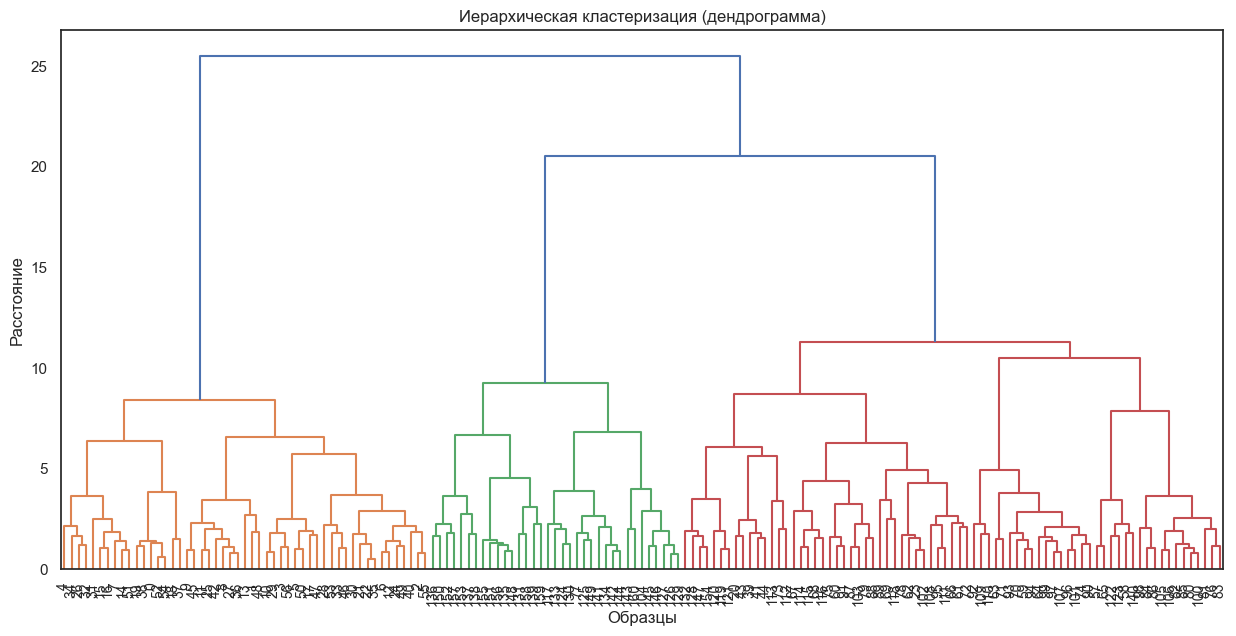

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

Z = linkage(df_scaled, method='ward', metric='euclidean') 

plt.figure(figsize=(15, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title('Иерархическая кластеризация (дендрограмма)')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()

На графике видно 3 очень высоких столба, которые соединяются примерно на уровне 25. 

Таким образом, оптимальное количество кластеров по дендрограмме - 3, потому что самый крупный разрыв наблюдается именно при объединении в 3 кластера.

### Построение моделей

Построим модели:

In [34]:
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmn = kmeans.fit_predict(df_scaled)

hier = AgglomerativeClustering(n_clusters=3)
labels_hier = hier.fit_predict(df_scaled)

Метрики моделей:

In [35]:
import numpy as np
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    rand_score, adjusted_rand_score, fowlkes_mallows_score, jaccard_score, pair_confusion_matrix
)
from scipy.spatial.distance import cdist
import pandas as pd

def J(y_true, y_pred):
    (tn, fp), (fn, tp) = pair_confusion_matrix(y_true, y_pred)
    return tp / (tp + fn + fp)

def cluster_analysis(X, labels):
    n_clusters = len(np.unique(labels))
    
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    
    ri = rand_score(y_true, labels)
    ari = adjusted_rand_score(y_true, labels)
    fm = fowlkes_mallows_score(y_true, labels)
    jac = J(y_true, labels)
    
    cluster_centers = []
    intra_dists = []
    
    for c in np.unique(labels):
        cluster_points = X[labels == c]
        center = cluster_points.mean(axis=0)
        cluster_centers.append(center)
        dists = cdist(cluster_points, [center])
        intra_dists.append(dists.mean())
    
    mean_intra = np.mean(intra_dists)
    
    if n_clusters > 1:
        pairwise_centers = cdist(cluster_centers, cluster_centers)
        mean_inter = pairwise_centers[np.triu_indices(n_clusters, k=1)].mean()
    else:
        mean_inter = 0
    
    compactness = np.sum(intra_dists)
    
    outliers = 0
    for c in np.unique(labels):
        cluster_points = X[labels == c]
        center = cluster_points.mean(axis=0)
        dists = cdist(cluster_points, [center]).flatten()
        threshold = dists.mean() + 2 * dists.std()
        outliers += np.sum(dists > threshold)
    
    return {
        "Silhouette": sil,
        "Calinski-Harabasz": ch,
        "Davies-Bouldin": db,
        "Rand Index": ri,
        "Adjusted Rand Index": ari,
        "Fowlkes-Mallows": fm,
        "Jaccard": jac,
        "Среднее внутрикластерное расстояние": mean_intra,
        "Среднее межкластерное расстояние": mean_inter,
        "Компактность": compactness,
        "Выбросы": outliers
    }

kmn_metrics = cluster_analysis(df_scaled, labels_kmn)

hier_metrics = cluster_analysis(df_scaled, labels_hier)

internal_df = pd.DataFrame({
    "Метод": ["K-means", "Иерархическая"],
    "Silhouette": [kmn_metrics["Silhouette"], hier_metrics["Silhouette"]],
    "Calinski-Harabasz": [kmn_metrics["Calinski-Harabasz"], hier_metrics["Calinski-Harabasz"]],
    "Davies-Bouldin": [kmn_metrics["Davies-Bouldin"], hier_metrics["Davies-Bouldin"]],
})

external_df = pd.DataFrame({
    "Метод": ["K-means", "Иерархическая"],
    "Rand Index": [kmn_metrics["Rand Index"], hier_metrics["Rand Index"]],
    "Adjusted Rand Index": [kmn_metrics["Adjusted Rand Index"], hier_metrics["Adjusted Rand Index"]],
    "Fowlkes-Mallows": [kmn_metrics["Fowlkes-Mallows"], hier_metrics["Fowlkes-Mallows"]],
    "Jaccard": [kmn_metrics["Jaccard"], hier_metrics["Jaccard"]],
})

cluster_props_df = pd.DataFrame({
    "Метод": ["K-means", "Иерархическая"],
    "Ср внутрикл расст": [
        kmn_metrics["Среднее внутрикластерное расстояние"],
        hier_metrics["Среднее внутрикластерное расстояние"]
    ],
    "Ср межкласт расст": [
        kmn_metrics["Среднее межкластерное расстояние"],
        hier_metrics["Среднее межкластерное расстояние"]
    ],
    "Компактность": [
        kmn_metrics["Компактность"],
        hier_metrics["Компактность"]
    ],
})

def print_metrics_table(title, df):
    print(f"{title}")
    display(df)  
    print()  
internal_df_alt = internal_df.copy()
internal_df_alt.index = internal_df_alt["Метод"]
internal_df_alt = internal_df_alt.drop(columns=["Метод"])
external_df_alt = external_df.copy()
external_df_alt.index = external_df_alt["Метод"]
external_df_alt = external_df_alt.drop(columns=["Метод"])
props_df_alt = cluster_props_df.copy()
props_df_alt.index = props_df_alt["Метод"]
props_df_alt = props_df_alt.drop(columns=["Метод"])
print_metrics_table("ВНУТРЕННИЕ ПОКАЗАТЕЛИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ", internal_df_alt)
print_metrics_table("СРАВНЕНИЕ С ИСТИННЫМИ МЕТКАМИ (ВНЕШНИЕ МЕТРИКИ)", external_df_alt)
print_metrics_table("ПРОСТРАНСТВЕННЫЕ ХАРАКТЕРИСТИКИ КЛАСТЕРОВ", props_df_alt)



ВНУТРЕННИЕ ПОКАЗАТЕЛИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ


,Silhouette,Calinski-Harabasz,Davies-Bouldin
Метод,,,
K-means,0.286911,64.444904,1.316710
Иерархическая,0.251342,56.266095,1.428701



СРАВНЕНИЕ С ИСТИННЫМИ МЕТКАМИ (ВНЕШНИЕ МЕТРИКИ)


,Rand Index,Adjusted Rand Index,Fowlkes-Mallows,Jaccard
Метод,,,,
K-means,0.935481,0.855321,0.903876,0.824610
Иерархическая,0.846273,0.661631,0.779846,0.638488



ПРОСТРАНСТВЕННЫЕ ХАРАКТЕРИСТИКИ КЛАСТЕРОВ


,Ср внутрикл расст,Ср межкласт расст,Компактность
Метод,,,
K-means,2.023280,3.298034,6.069839
Иерархическая,2.042045,3.331442,6.126134


Анализ полученных результатов показывает, что оба метода формируют осмысленные кластеры, однако между ними наблюдаются заметные различия по качеству разбиения. Внутренние показатели демонстрируют, что K-means обеспечивает более плотное и хорошо отделённое групповое распределение объектов. Силуэт у этого метода выше, чем у иерархической кластеризации, что говорит о более согласованной принадлежности объектов к своим кластерам и меньшем перекрытии границ. Индекс Калински–Харабаса также выше для K-means, подтверждая более выраженную структурированность кластеров, а значение индекса Дэвиса–Болдина ниже, что свидетельствует о меньшей степени пересечения кластеров и более чётком разделении между ними.

С точки зрения соответствия с истинными метками классов, K-means снова показывает более высокие результаты. Показатели Rand Index и Adjusted Rand Index находятся на уровне 0.93 и 0.86 соответственно, что говорит о высокой согласованности с исходными группами. Метрика Fowlkes–Mallows и коэффициент Jaccard также выше, что подтверждает, что кластеризация K-means точнее отражает реальные структуры в данных по сравнению с иерархическим методом.

Геометрические характеристики кластеров показывают, что средние внутрикластерные расстояния у K-means чуть меньше, чем у иерархической кластеризации, что указывает на более плотное расположение объектов внутри кластеров. Среднее межкластерное расстояние немного меньше у K-means, однако различие незначительное, а компактность кластеров чуть ниже, что подтверждает аккуратность формирования групп. В целом, все метрики указывают на преимущество K-means как более стабильного и точного метода кластеризации для данного набора данных, хотя иерархический подход также формирует осмысленные, но более рыхлые кластеры.

Оценим центры кластеров:

In [36]:
def compute_cluster_centers(X, labels):
    centers = []
    for c in np.unique(labels):
        cluster_points = X[labels == c]
        center = cluster_points.mean(axis=0)
        centers.append(center)
    centers_df = pd.DataFrame(centers, columns=df.columns)
    centers_df.index = [f"Cluster {i}" for i in range(len(centers))]
    return centers_df

kmn_centers_df = compute_cluster_centers(df_scaled, labels_kmn)
print("Центры кластеров K-means:")
print(kmn_centers_df.round(3))

hier_centers_df = compute_cluster_centers(df_scaled, labels_hier)
print("\nЦентры кластеров Иерархической кластеризации:")
print(hier_centers_df.round(3))


Центры кластеров K-means:
           Malic_Acid    Ash  Ash_Alcanity  Magnesium  Flavanoids  \
Cluster 0      -0.481 -0.621         0.200     -0.738      -0.005   
Cluster 1       1.065  0.323         0.746      0.041      -1.225   
Cluster 2      -0.327  0.337        -0.722      0.648       0.889   

           Nonflavanoid_Phenols  Color_Intensity  Proline  
Cluster 0                 0.092           -0.905   -0.820  
Cluster 1                 0.762            0.914   -0.412  
Cluster 2                -0.634            0.171    1.050  

Центры кластеров Иерархической кластеризации:
           Malic_Acid    Ash  Ash_Alcanity  Magnesium  Flavanoids  \
Cluster 0      -0.256 -0.443         0.189     -0.437      -0.113   
Cluster 1      -0.459  0.349        -0.833      0.660       1.004   
Cluster 2       1.217  0.442         0.809     -0.025      -1.222   

           Nonflavanoid_Phenols  Color_Intensity  Proline  
Cluster 0                -0.023           -0.699   -0.630  
Cluster 1    

Центры кластеров показывают, что оба метода выделяют три группы вин с разными химическими характеристиками. В K-means Cluster 0 соответствует винам с низким содержанием Malic Acid, Ash, Magnesium, Color Intensity и Proline - то есть более лёгкие, мягкие вина. Cluster 1 - вина с высоким Malic Acid и Ash Alcanity, но низкими Flavanoids, что может указывать на более терпкие, кислотные сорта. Cluster 2 характеризуется высокой концентрацией Proline и Flavanoids, то есть более плотные, насыщенные вина.

Иерархическая кластеризация выделяет схожие группы, но контрасты менее выражены: Cluster 0 тоже «лёгкое» вино, Cluster 1 - кислое и терпкое, а Cluster 2 - более насыщенное, с высоким цветом и умеренным Proline. В целом K-means даёт более чёткое разделение по ключевым вкусовым и химическим характеристикам, а иерархический метод формирует группы с более плавными переходами между типами вина.

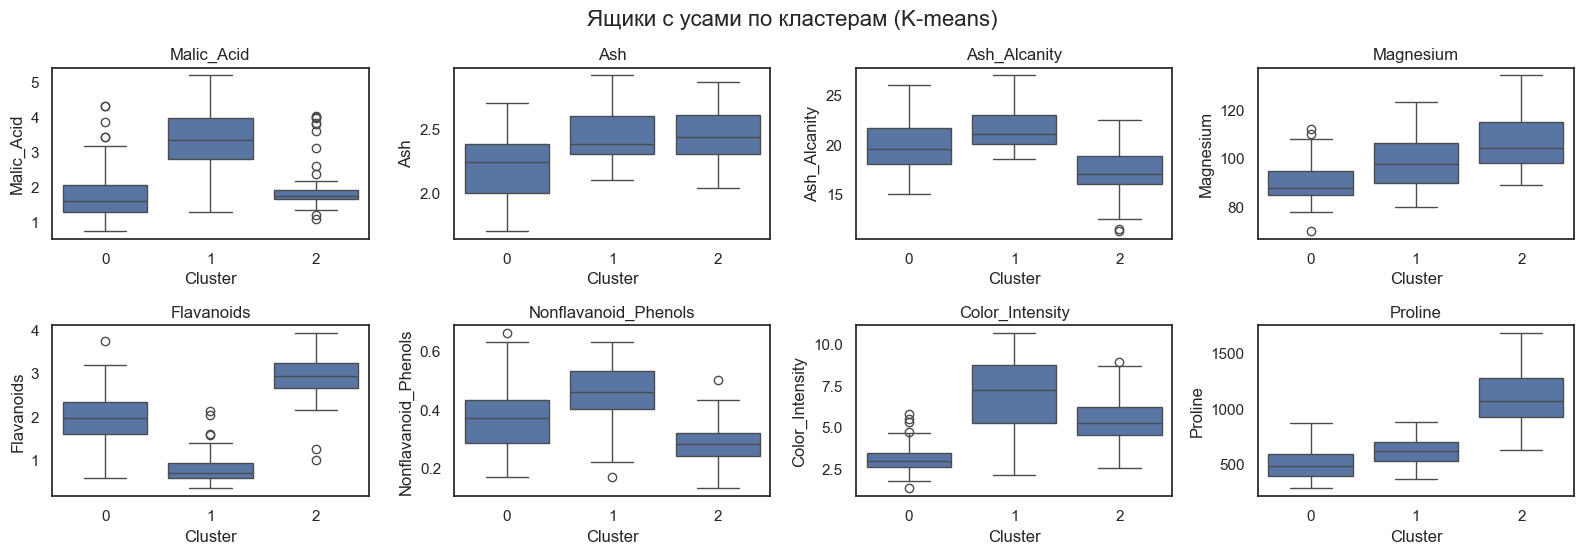

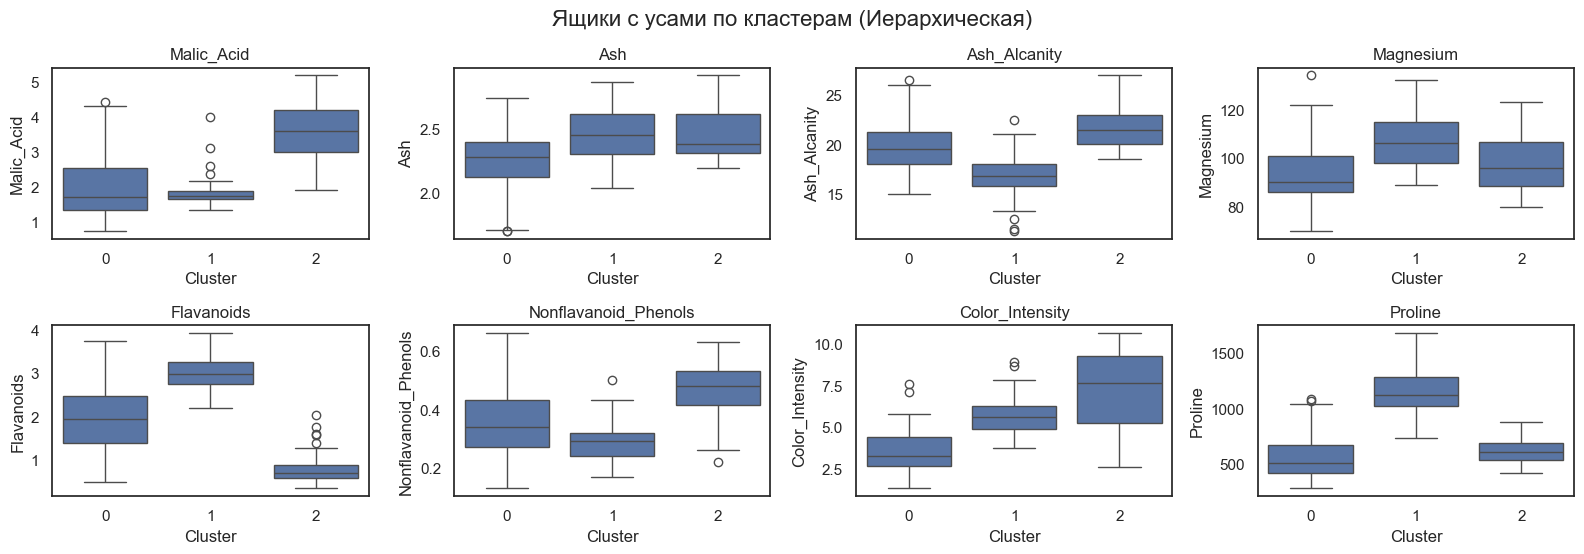

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_kmn_clusters = df.copy()
df_kmn_clusters['Cluster'] = labels_kmn
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Cluster', y=col, data=df_kmn_clusters)
    plt.title(col)
plt.tight_layout()
plt.suptitle('Ящики с усами по кластерам (K-means)', y=1.02, fontsize=16)
plt.show()

df_hier_clusters = df.copy()
df_hier_clusters['Cluster'] = labels_hier
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Cluster', y=col, data=df_hier_clusters)
    plt.title(col)
plt.tight_layout()
plt.suptitle('Ящики с усами по кластерам (Иерархическая)', y=1.02, fontsize=16)
plt.show()


Судя по ящикам с усами для K-means и иерархической кластеризации, можно сделать следующие наблюдения по распределению химических характеристик вин в кластерах.

Для K-means Cluster 0 выделяется низкими значениями Malic Acid, Ash, Magnesium, Color Intensity и Proline, что соответствует лёгким и мягким винам. Cluster 1 имеет высокие показатели Malic Acid и Ash Alcanity, но низкие Flavanoids, что указывает на более терпкие и кислые сорта. Cluster 2 отличается высокой концентрацией Proline и Flavanoids, а также умеренной Color Intensity, что соответствует насыщенным, более структурированным винам. В целом, контрасты между кластерами чёткие и последовательные, особенно по ключевым характеристикам вкуса и структуры.

Для иерархической кластеризации распределение признаков менее выражено. Cluster 0 также характеризуется относительно низкими значениями Malic Acid, Ash и Magnesium, но разброс шире, чем у K-means. Cluster 1 выделяется высокими Malic Acid и Ash Alcanity, но Flavanoids умеренные, создавая менее резкое разделение. Cluster 2 имеет высокие значения Color Intensity и умеренный Proline, что соответствует насыщенным винам, но при этом границы между группами менее чёткие. В целом иерархический метод формирует более плавные переходы между типами вина и менее экстремальные значения признаков в центрах кластеров.

Таким образом, K-means создаёт более контрастные и отчётливо отделённые кластеры, хорошо отражающие различия между лёгкими, кислотными и насыщенными винами, тогда как иерархическая кластеризация формирует группы с более сглаженными различиями, что может быть полезно для анализа плавных переходов между типами вина.

Оценим значимость признаков на кластеры:

In [38]:
import pandas as pd
from scipy.stats import f_oneway

def feature_importance_anova(X, labels):
    results = []
    for col in X.columns:
        groups = [X[col][labels == c] for c in np.unique(labels)]
        f_stat, p_val = f_oneway(*groups)
        results.append((col, f_stat, p_val))
    return pd.DataFrame(results, columns=['Feature', 'F_stat', 'p_value']).sort_values(by='F_stat', ascending=False)

anova_kmn = feature_importance_anova(df, labels_kmn)
print("Значимость признаков для K-means:")
print(anova_kmn.round(4))

anova_hier = feature_importance_anova(df, labels)
print("\nЗначимость признаков для Иерархической кластеризации:")
print(anova_hier.round(4))


Значимость признаков для K-means:
                Feature    F_stat  p_value
4            Flavanoids  192.7090      0.0
7               Proline  182.1942      0.0
6       Color_Intensity   86.9864      0.0
0            Malic_Acid   59.8501      0.0
2          Ash_Alcanity   45.0741      0.0
3             Magnesium   42.4048      0.0
5  Nonflavanoid_Phenols   36.2039      0.0
1                   Ash   20.4224      0.0

Значимость признаков для Иерархической кластеризации:
                Feature   F_stat  p_value
6       Color_Intensity  58.1641      0.0
7               Proline  57.3402      0.0
4            Flavanoids  55.3052      0.0
1                   Ash  29.8731      0.0
0            Malic_Acid  29.1332      0.0
2          Ash_Alcanity  25.3544      0.0
5  Nonflavanoid_Phenols  15.8085      0.0
3             Magnesium  15.4249      0.0


Для K-means наибольшее влияние на формирование кластеров оказывают Flavanoids и Proline, с очень высокими F-статистиками, что говорит о сильной вариативности этих признаков между кластерами. Далее идут Color_Intensity и Malic_Acid, которые также заметно разделяют кластеры. Признаки вроде Ash и Nonflavanoid_Phenols менее значимы, но всё равно статистически значимы (p_value = 0.0).

Для иерархической кластеризации на вершине значимости оказывается Color_Intensity, затем Proline и Flavanoids. Влияние признаков вроде Ash, Malic_Acid и Ash_Alcanity умеренное, а Magnesium и Nonflavanoid_Phenols играют наименьшую роль, хотя и они значимы.

Интересно, что K-means отдаёт большее значение химическим компонентам (Flavanoids, Proline), тогда как иерархическая кластеризация сильнее реагирует на визуально выраженные характеристики (Color_Intensity), что логично: разные алгоритмы оценивают расстояния и распределение данных по-разному.

### Влияение параметров

Исследуем влияние количества кластеров на метод K-средних:

   k  Silhouette  Calinski-Harabasz  Davies-Bouldin   Rand  Fowlkes-Mallows
0  2       0.252             58.975           1.493  0.846            0.724
1  3       0.287             64.445           1.317  0.846            0.904
2  4       0.247             51.940           1.483  0.846            0.823
3  5       0.241             45.191           1.481  0.846            0.782
4  6       0.188             40.931           1.627  0.846            0.636
5  7       0.185             38.000           1.626  0.846            0.606


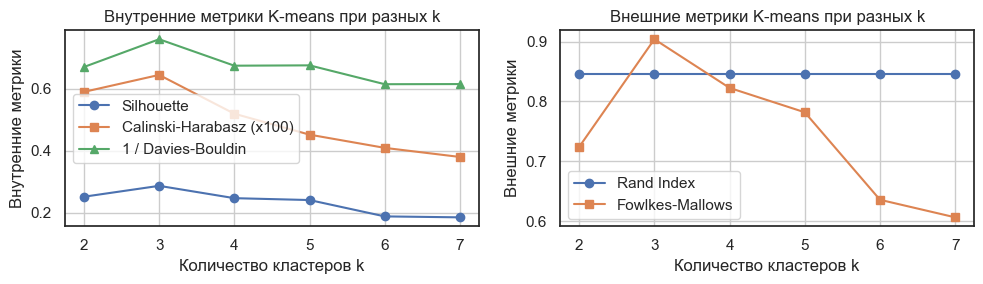

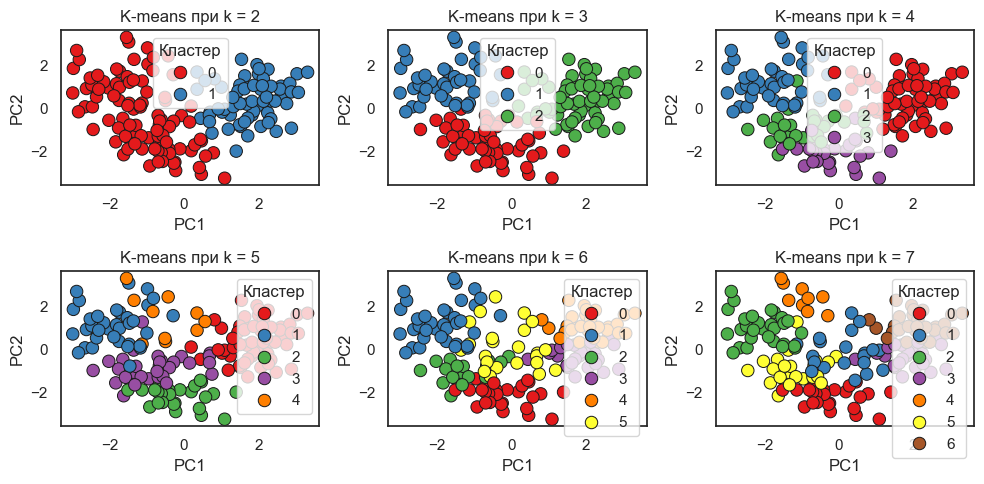

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, fowlkes_mallows_score
from sklearn.decomposition import PCA

k_values = range(2, 8)  
results = []

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    
    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    
    ri = rand_score(y_true, labels_hier)
    fm = fowlkes_mallows_score(y_true, labels)
    
    results.append({
        "k": k,
        "Silhouette": sil,
        "Calinski-Harabasz": ch,
        "Davies-Bouldin": db,
        "Rand": ri,
        "Fowlkes-Mallows": fm
    })

df_results = pd.DataFrame(results)
print(df_results.round(3))

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(df_results["k"], df_results["Silhouette"], marker='o', label='Silhouette')
plt.plot(df_results["k"], df_results["Calinski-Harabasz"]/100, marker='s', label='Calinski-Harabasz (x100)')
plt.plot(df_results["k"], 1/df_results["Davies-Bouldin"], marker='^', label='1 / Davies-Bouldin')
plt.xlabel('Количество кластеров k')
plt.ylabel('Внутренние метрики')
plt.title('Внутренние метрики K-means при разных k')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_results["k"], df_results["Rand"], marker='o', label='Rand Index')
plt.plot(df_results["k"], df_results["Fowlkes-Mallows"], marker='s', label='Fowlkes-Mallows')
plt.xlabel('Количество кластеров k')
plt.ylabel('Внешние метрики')
plt.title('Внешние метрики K-means при разных k')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i, k in enumerate(k_values):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    
    ax = axes[i // 3, i % 3]
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=labels,
        palette='Set1',
        ax=ax,
        s=80,
        edgecolor='k'
    )
    ax.set_title(f'K-means при k = {k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(title='Кластер', loc='best')

plt.tight_layout()
plt.show()


При k=2 Silhouette умеренный (0.252), Calinski-Harabasz средний (58.975), Davies-Bouldin высокий (1.493), внешние метрики Rand 0.846, Fowlkes-Mallows 0.724. При k=3 Silhouette растёт до 0.287, Calinski-Harabasz увеличивается до 64.445, Davies-Bouldin снижается до 1.317, Fowlkes-Mallows максимально 0.904 - оптимальное разбиение. При k=4–5 Silhouette и Calinski-Harabasz падают (0.247–0.241, 51.94–45.19), Davies-Bouldin остаётся высоким (1.483–1.481), Fowlkes-Mallows уменьшается (0.823–0.782). При k=6–7 внутренние метрики ухудшаются: Silhouette снижается до 0.188–0.185, Calinski-Harabasz падает до 40.931–38.0, Davies-Bouldin растёт (1.626–1.627), Fowlkes-Mallows падает до 0.636–0.606, внешние метрики Rand остаются неизменными. Оптимальное количество кластеров K-means по внутренним и внешним метрикам - 3.

## Визуализация результатов

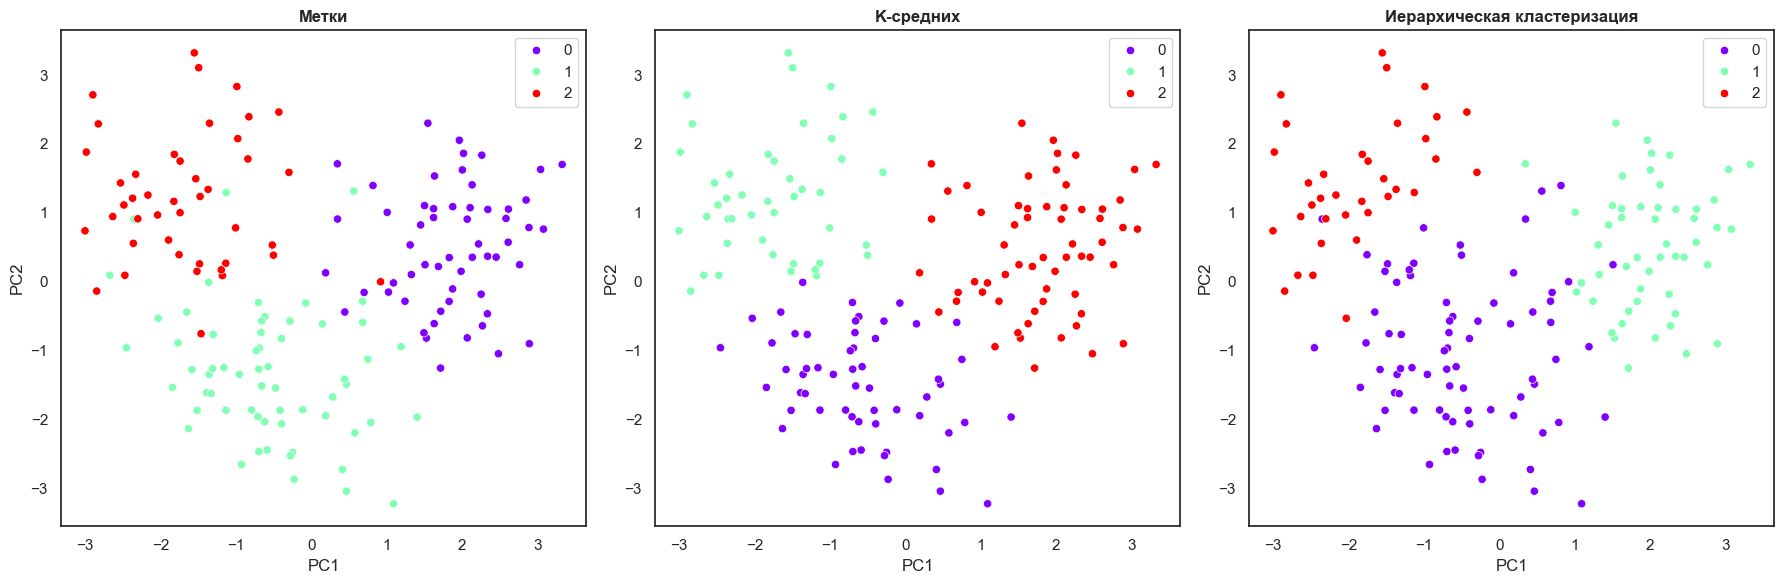

In [40]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

sns.set(style="white")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_true,
    palette='rainbow',
    ax=axes[0],
    legend='full'
)
axes[0].set_title('Метки', fontsize=12, weight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_kmn,
    palette='rainbow',
    ax=axes[1],
    legend='full'
)
axes[1].set_title('K-средних', fontsize=12, weight='bold')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_hier,
    palette='rainbow',
    ax=axes[2],
    legend='full'
)
axes[2].set_title('Иерархическая кластеризация', fontsize=12, weight='bold')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()


При разбиении на три кластера K-means на плоскости первых двух главных компонент формирует три отчётливо различимые группы. Один кластер полностью отделён от других, что указывает на наличие в данных подгруппы объектов с сильно выраженными и уникальными признаками. Два других кластера частично перекрываются, это говорит о том, что объекты в этих группах имеют схожие характеристики по некоторым признакам, и алгоритм видит их как отдельные кластеры, несмотря на близость в признаковом пространстве.

Иерархическая кластеризация даёт похожее разделение, три кластера тоже выделяются, но их границы немного отличаются: перекрытие между кластерами может быть больше или меньше, что связано с тем, что алгоритм строит дерево кластеров и объединяет объекты по критерию расстояния, а не по центру масс, как K-means.

Сравнение с истинными классами показывает, что большинство объектов правильно попадают в свои кластеры, особенно хорошо видна группа, полностью отделённая от остальных. Другие кластеры частично смешаны с соседними классами, что отражает реальное перекрытие характеристик в данных. В целом три кластера логично отражают внутреннюю структуру винного датасета, выделяя группы с похожими химическими и органолептическими свойствами.

## Заключение

Кластеризация на трёх группах показала, что K-means и иерархический метод эффективно выявляют внутреннюю структуру винного датасета. Один из кластеров отчётливо выделяется, отражая наличие подгруппы с уникальными характеристиками, в то время как два других частично перекрываются, показывая близость их признаков. Сравнение с истинными классами подтверждает высокую точность кластеризации, особенно для явно выраженного кластера. Различия между методами в границах кластеров подчёркивают специфику алгоритмов: K-means ориентирован на центры масс, иерархическая кластеризация - на последовательное объединение по расстоянию. В целом три кластера адекватно представляют распределение объектов, что позволяет использовать их для сегментации вин по химическим и органолептическим характеристикам.